In [13]:
# Posted Aug 7
# Assigned
# Learning Outcomes:
# * Load and explore the Iris dataset
# * Visualize features using pairplots
# * Train and test a KNN classifier
# * Connect distance-based learning to vector space
# * Relate classification results to class probabilities

# Activities:
# Setup (15 mins)
# * Launch Jupyter or Colab
# * Import required libraries

# Data Exploration (30 mins)
# * Load and inspect the Iris dataset
# * Plot class distribution, use seaborn pairplots

# Model Building (45 mins)
# * Split data into training/testing
# * Train a K-Nearest Neighbors (KNN) model
# * Test with different k values (1, 3, 5, 7)
# * Evaluate accuracy

# Wrap-up and Sharing (30 mins)
# * Document model results
# * Push notebook to GitHub with README summary



In [14]:

# Lab Assignment 1: Iris Dataset Exploration and KNN Classification

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sk learn dependencies
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


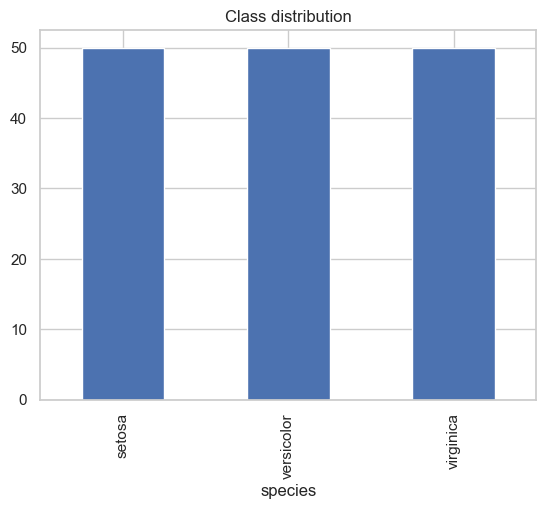

In [15]:
# load the IRIS dataset

# load from scikit-learn
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
df = pd.concat([X, y.rename("target")], axis=1)
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))

df.head()
df.info()
df.describe()

# distribution
df["species"].value_counts()
df["species"].value_counts().plot(kind="bar", title="Class distribution")
plt.show()



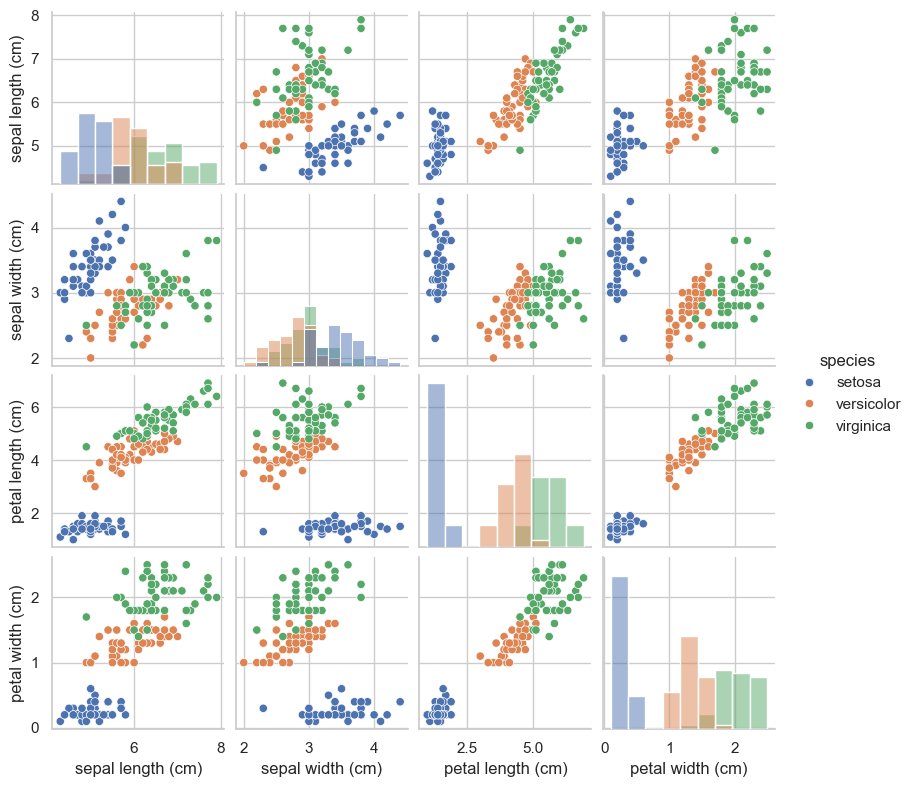

In [16]:
# pairplot 

sns.set(style="whitegrid", context="notebook")
sns.pairplot(df, vars=iris.feature_names, hue="species", height=2.0, diag_kind="hist")
plt.show()

In [17]:
# splitting dataset for training and testing 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train.shape, X_test.shape

# KNN and model stuff

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaled_results = []

for k in [1, 3, 5, 7]:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scaled_results.append({"k": k, "accuracy": acc, "model": pipe, "y_pred": y_pred})

pd.DataFrame(scaled_results)[["k", "accuracy"]]


,k,accuracy
0,1,0.933333
1,3,0.911111
2,5,0.911111
3,7,0.933333


Best k: 1 | Accuracy: 0.933
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



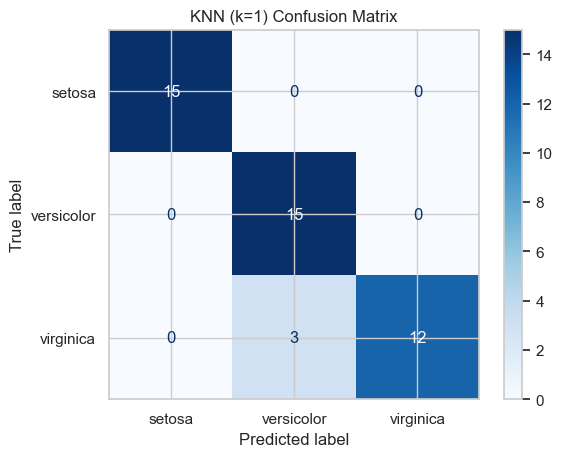

In [18]:
# metrics and stuff

best = max(scaled_results, key=lambda d: d["accuracy"])
best_k = best["k"]
best_model = best["model"]
best_acc = best["accuracy"]
best_k, best_acc

from sklearn.metrics import ConfusionMatrixDisplay

print(f"Best k: {best_k} | Accuracy: {best_acc:.3f}")
print(classification_report(y_test, best["y_pred"], target_names=iris.target_names))

cm = confusion_matrix(y_test, best["y_pred"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title(f"KNN (k={best_k}) Confusion Matrix")
plt.show()

In [19]:
# predicted 

proba = best_model.predict_proba(X_test)[:]
pred = best_model.predict(X_test)[:]
list(zip(pred, proba.round(3)))


[(2, array([0., 0., 1.])),
 (1, array([0., 1., 0.])),
 (1, array([0., 1., 0.])),
 (1, array([0., 1., 0.])),
 (2, array([0., 0., 1.])),
 (2, array([0., 0., 1.])),
 (1, array([0., 1., 0.])),
 (1, array([0., 1., 0.])),
 (0, array([1., 0., 0.])),
 (2, array([0., 0., 1.])),
 (0, array([1., 0., 0.])),
 (0, array([1., 0., 0.])),
 (2, array([0., 0., 1.])),
 (2, array([0., 0., 1.])),
 (0, array([1., 0., 0.])),
 (2, array([0., 0., 1.])),
 (1, array([0., 1., 0.])),
 (0, array([1., 0., 0.])),
 (0, array([1., 0., 0.])),
 (0, array([1., 0., 0.])),
 (1, array([0., 1., 0.])),
 (0, array([1., 0., 0.])),
 (1, array([0., 1., 0.])),
 (2, array([0., 0., 1.])),
 (2, array([0., 0., 1.])),
 (1, array([0., 1., 0.])),
 (1, array([0., 1., 0.])),
 (1, array([0., 1., 0.])),
 (1, array([0., 1., 0.])),
 (0, array([1., 0., 0.])),
 (1, array([0., 1., 0.])),
 (2, array([0., 0., 1.])),
 (1, array([0., 1., 0.])),
 (0, array([1., 0., 0.])),
 (2, array([0., 0., 1.])),
 (0, array([1., 0., 0.])),
 (0, array([1., 0., 0.])),
 